# Day 2: Scaling and normalization
Welcome to day 2 of the 5-Day Data Challenge! Today, we're going to be looking at how to scale and normalize data (and what the difference is between the two!). 
<br>
<br>


In [2]:
import pandas as pd
import numpy as np

# use for box-cox transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in data
kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

Now that we have our data, let's start learning about scaling & normalization. 
<br>
# Scaling vs. Normalization: What's the difference?
<br>
## Scaling
<br>
This means when you transform your data, in order to fit within a specific scale(ex. 0 to 100). Scaling your data is important when you are working with methods based on distance of data poins, like support vector machines(SVM) or k-nearest neighbors(KNN).
<br>
An example of this would be when you are dealing with prices of some products in both Yen and US Dollars. One US Dollar is not worth one Yen, so if you dont scale your prices methods for SVM or KNN then they will consider a price difference of 1 Yen as equivalent to a difference of 1 US Dollar!
<br>
Scaling your variables can help you compare different variables on equal footing. Let's look at an example:

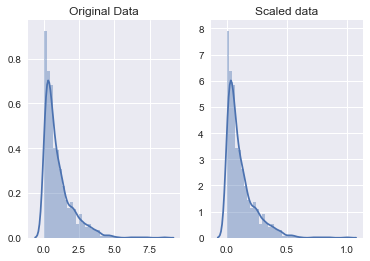

In [3]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.
<br>
<br>
<br>
## Normalization
<br>
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.
 <br>
In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)
<br>
The method were using to normalize here is called the Box-Cox Transformation. Let's take a quick peek at what normalizing some data looks like:  


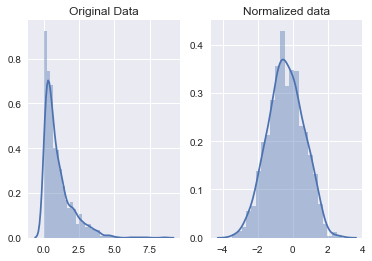

In [4]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

You can now see the difference between the shapes of the original data and the now normalized data. 
<br> 
<br>    
## Practice scaling
We're going to be using a dataset of Kickstarter campaings.
<br>
Let's start by scaling the goals of each campaign, which is how much money they were asking for.

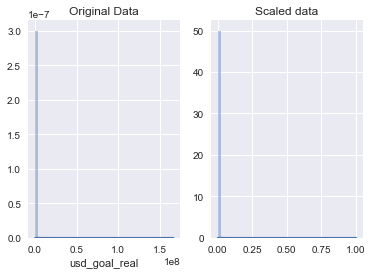

In [6]:
# select the usd_goal_real column
usd_goal = kickstarters_2017.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns= [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

From the axis, you can see the scaling changed the scales of the plots dramatically, but not the shape of the data. A majority of the campaigns appear to have very small goals, while very few have actual large goals. 

## Practice Normalization
Ok, now let's try practicing normalization. We're going to normalize the amount of money pledged to each campaign.

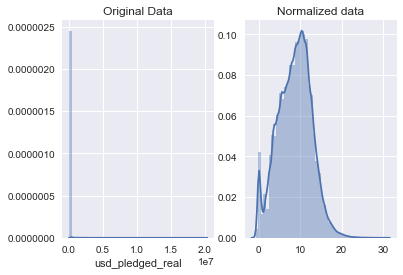

In [9]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges(using their index)
positive_pledges = kickstarters_2017.usd_pledged_real[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

Dealing with real data, you will never get a perfectly normalized data transformation. The above graph isn't perfect, but it is much closer to normal than before.
<br>
<br>
That's all for today. Thanks for following along.